### Project: Data Science Salaries( 2020 To 2024 ) EDA
**Introduction:** Introduce the project and dataset, outlining the goal of analyzing salaries in the data science field.

**Data Analysis:** Summarize the main findings from the analysis, such as salary trends based on job titles, experience levels, and company sizes.

**Visualization:** Highlight key visualizations used to present the data, such as bar plots for salary comparisons and box plots for salary distributions.

**Conclusion:** Conclude with the insights gained from the analysis, including any recommendations for companies or individuals in the data science field.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DataScience_salaries_2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [3]:
df.shape

(14838, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# value counts of experience_level
df['experience_level'].value_counts()

experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64

In [7]:
# value counts employment_type
df['employment_type'].value_counts()

employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64

In [8]:
# value counts of job tittle
df['job_title'].value_counts()

job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
                                   ... 
Deep Learning Researcher              1
Big Data Developer                    1
AWS Data Architect                    1
Staff Machine Learning Engineer       1
CRM Data Analyst                      1
Name: count, Length: 153, dtype: int64

**Salary Analysis by Job Title and Experience Level**

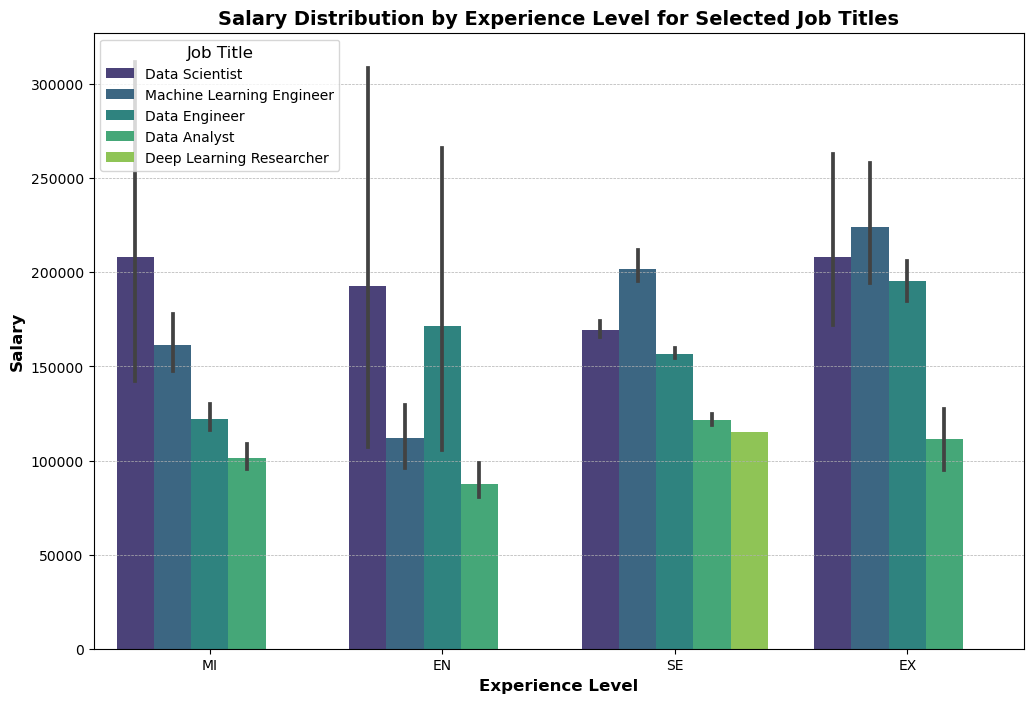

In [9]:
selected_job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Deep Learning Researcher']
filtered_df = df[df['job_title'].isin(selected_job_titles)]

plt.figure(figsize=(12, 8))
sns.barplot(x='experience_level', y='salary', hue='job_title', data=filtered_df, palette='viridis')

plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Salary', fontsize=12, fontweight='bold')
plt.title('Salary Distribution by Experience Level for Selected Job Titles', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title='Job Title', title_fontsize='large')
plt.show()

This bar plot visualizes the distribution of salaries by experience level for a selected set of job titles. The x-axis represents the experience level, while the y-axis represents the salary. Each bar is segmented by job title, with different colors indicating different job titles.
The plot allows viewers to compare the salary distributions across different experience levels for the selected job titles. The legend on the right side of the plot helps identify which color corresponds to each job title.
The plot is useful for understanding how salaries vary across experience levels for specific job titles, providing insights into the salary trends within the selected job titles.

**Salary Disparity Analysis**

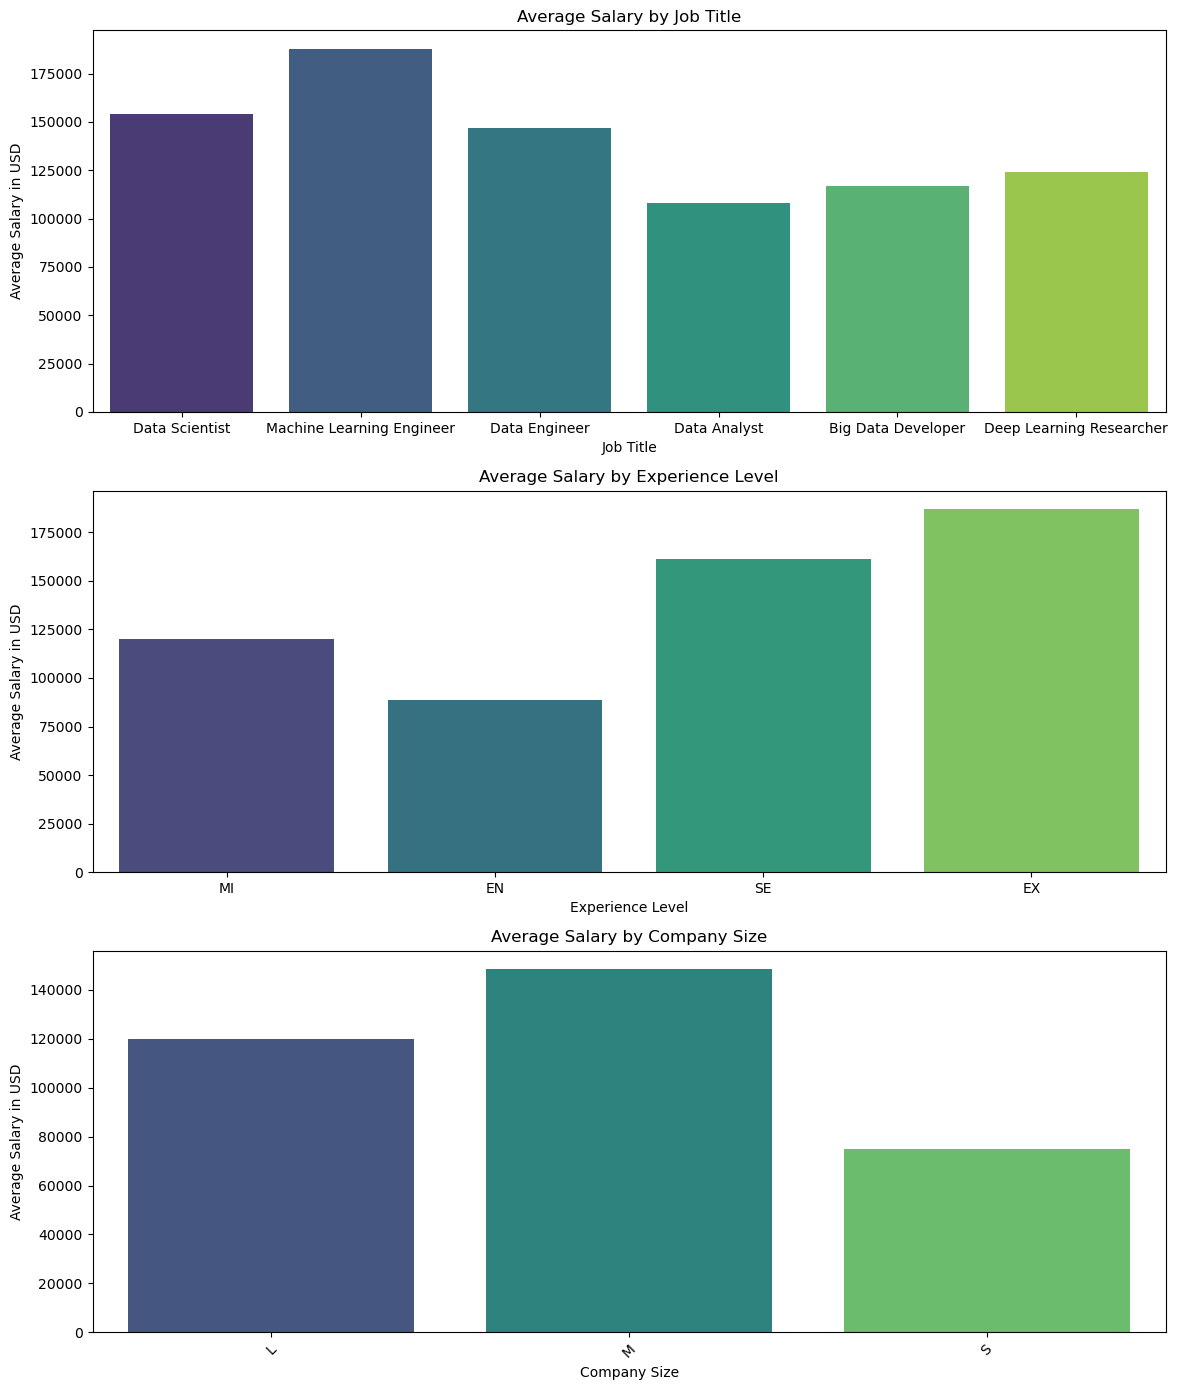

In [10]:
# Select 5 job titles
selected_job_titles =  ['Data Engineer', 'Data Scientist', 'Data Analyst','Deep Learning Researcher','Machine Learning Engineer','Big Data Developer']

# Filter the dataframe for the selected job titles
filtered_df = df[df['job_title'].isin(selected_job_titles)]

# Calculate the average salary for each group
avg_salary_by_job = filtered_df.groupby('job_title')['salary_in_usd'].mean().reset_index()
avg_salary_by_exp = filtered_df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
avg_salary_by_size = filtered_df.groupby('company_size')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(12, 14))

# Average salary by job title
plt.subplot(3, 1, 1)
sns.barplot(x='job_title', y='salary_in_usd', data=filtered_df, palette='viridis', ci=None)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')

# Average salary by experience level
plt.subplot(3, 1, 2)
sns.barplot(x='experience_level', y='salary_in_usd', data=filtered_df, palette='viridis', ci=None)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')

# Average salary by company size
plt.subplot(3, 1, 3)
sns.barplot(x='company_size', y='salary_in_usd', data=filtered_df, palette='viridis', ci=None)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

create a grouped bar plot for the average salaries of the selected job titles, experience levels, and company sizes. Each group is represented by a different color, making it easy to compare the average salaries across different categories.

**Geographical Salary Comparison**

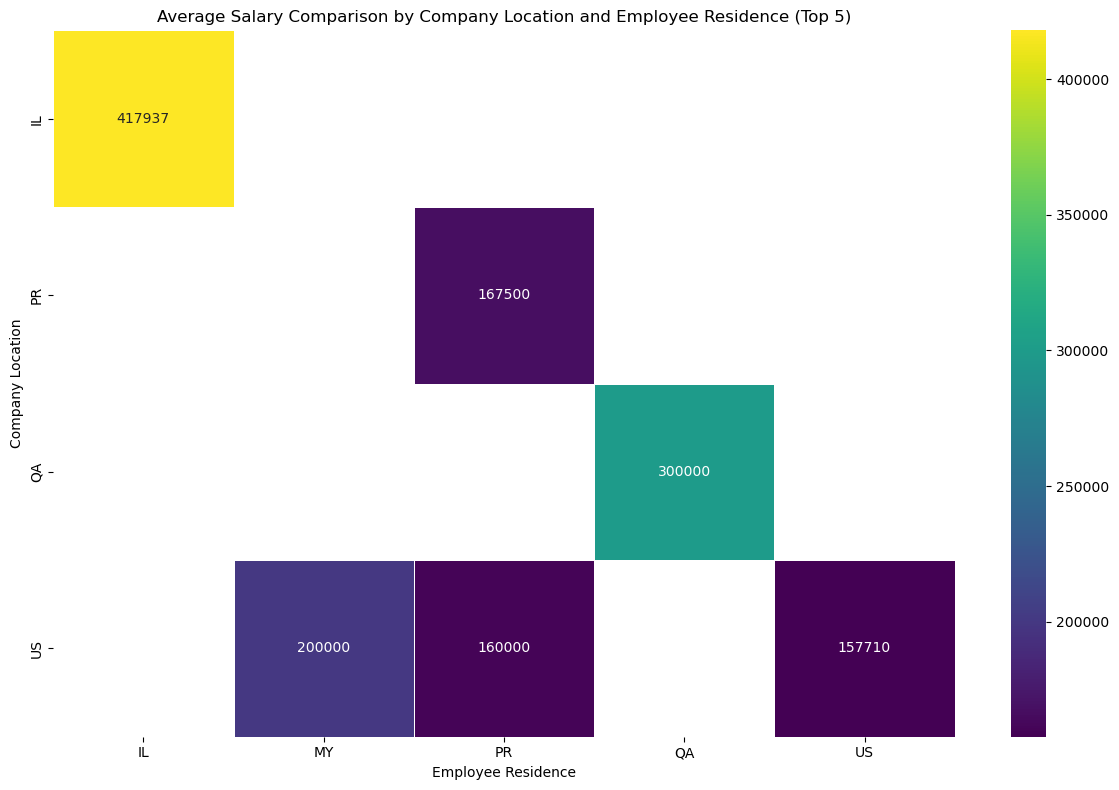

In [11]:
# Get the top 5 residences and locations based on average salary
top_residences = df.groupby('employee_residence')['salary_in_usd'].mean().nlargest(5).index
top_locations = df.groupby('company_location')['salary_in_usd'].mean().nlargest(5).index

# Filter the dataframe for the top 5 residences and locations
filtered_df = df[df['employee_residence'].isin(top_residences) & df['company_location'].isin(top_locations)]

# Create a pivot table for average salary by company location and employee residence
pivot_table_location = filtered_df.pivot_table(index='company_location', columns='employee_residence', values='salary_in_usd', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_location, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Average Salary Comparison by Company Location and Employee Residence (Top 5)')
plt.xlabel('Employee Residence')
plt.ylabel('Company Location')
plt.tight_layout()
plt.show()

calculates the average salary for each residence and location and selects the top 5 residences and locations based on average salary. It then filters the dataset to include only data for these top residences and locations. Finally, it creates a heatmap to visualize the average salary comparison between company locations and employee residences, focusing on the top 5 of each. The heatmap provides a clear comparison of salary levels across different locations and residences.

### Pivot tables & Heapmaps

**Creates two pivot tables** to analyze the mean salary in USD based on experience level and company size. The first pivot table, 'pivot_exp', shows the mean salary for each combination of experience level and company size. The second pivot table, 'pivot_comp', shows the mean salary for each combination of company size and experience level.

The code then generates a side-by-side heatmap for each pivot table, visualizing the mean salary distribution. The heatmaps use color gradients to represent the salary levels, with annotations showing the exact salary values. These visualizations help in understanding how salary varies based on experience level and company size.

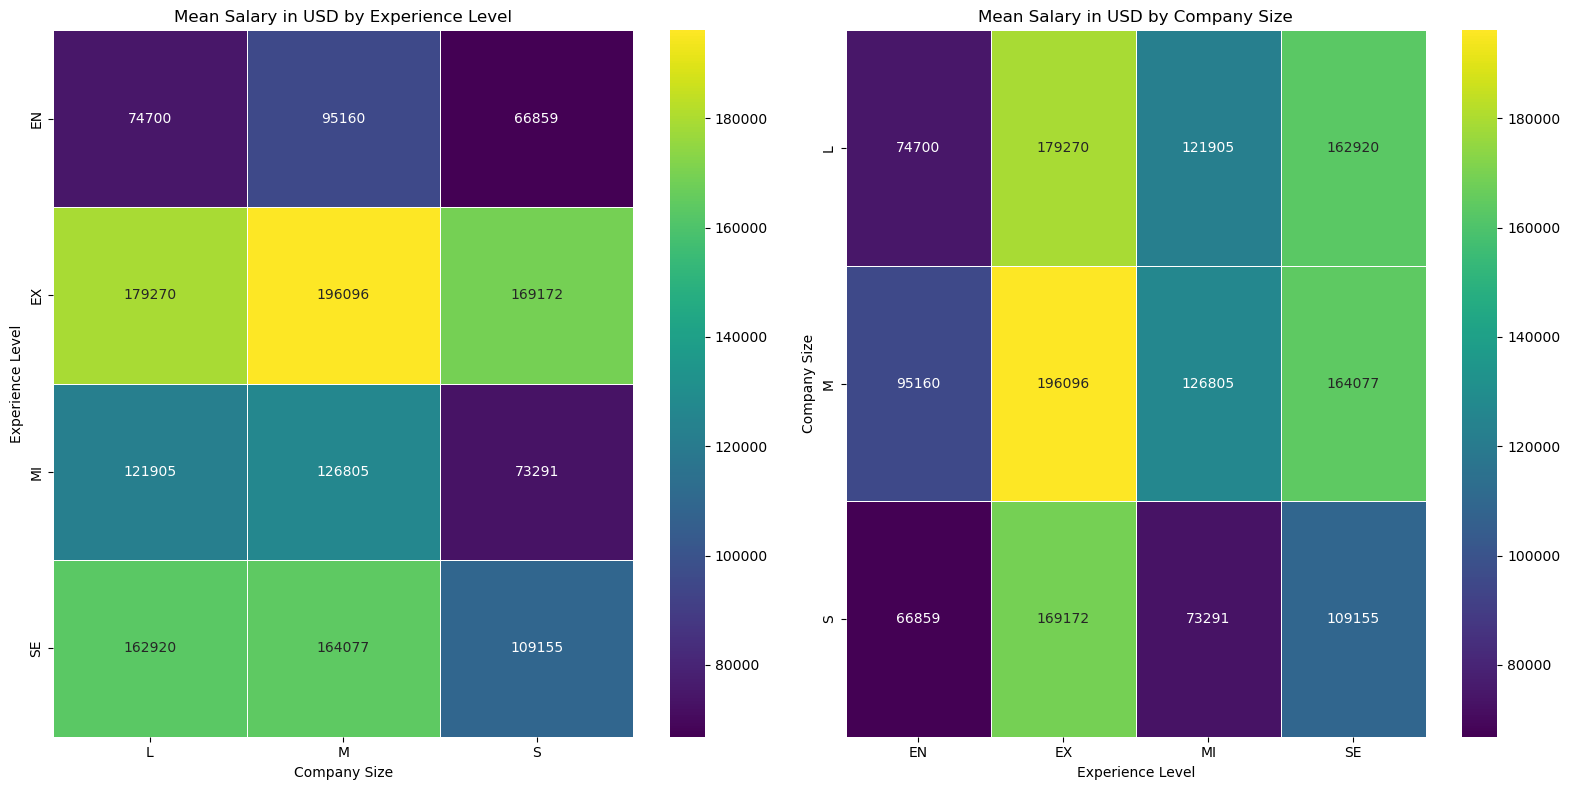

In [12]:
pivot_exp = df.pivot_table(index='experience_level', columns='company_size', values='salary_in_usd', aggfunc='mean')
pivot_comp = df.pivot_table(index='company_size', columns='experience_level', values='salary_in_usd', aggfunc='mean')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_exp, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Mean Salary in USD by Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Experience Level')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_comp, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Mean Salary in USD by Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')

plt.tight_layout()
plt.show()

### Box Plot 

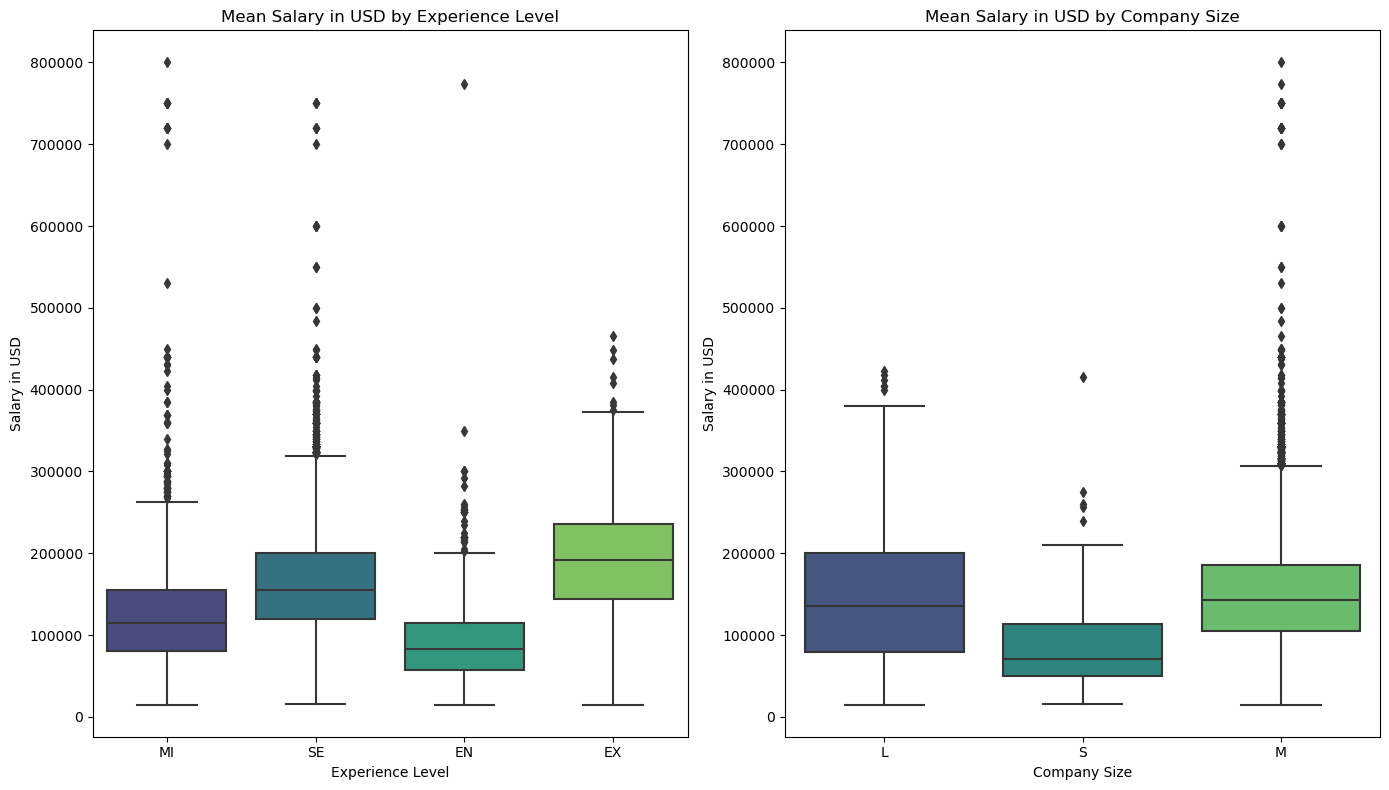

In [13]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='viridis')
plt.title('Mean Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

plt.subplot(1, 2, 2)
sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette='viridis')
plt.title('Mean Salary in USD by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')

plt.tight_layout()
plt.show()

### Box Plot

A box plot to visualize the distribution of salaries (in USD) across different company sizes. Each box in the plot represents the salary distribution for a specific company size category. The box extends from the lower to the upper quartile values of the salary data, with a line inside representing the median salary. The whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers" using a method that is a function of the inter-quartile range. Box plots are useful for quickly identifying the central tendency, dispersion, and skewness of the salary data for each company size category.


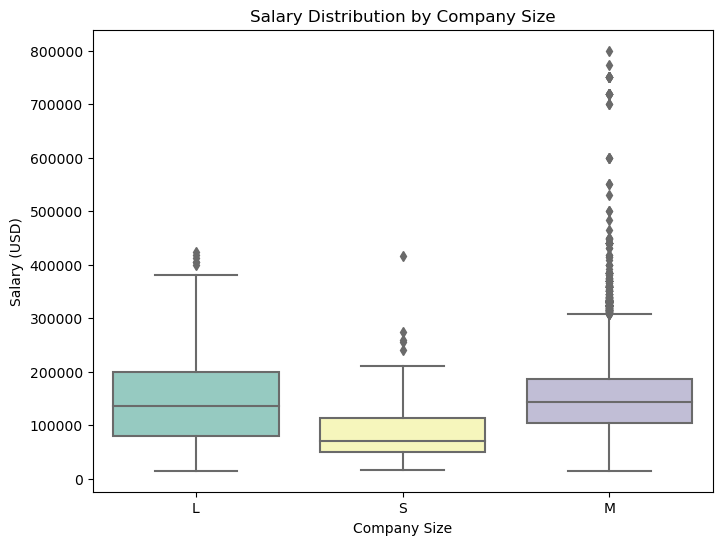

In [14]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette='Set3')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Company Size')
plt.show()

### Trend Analysis

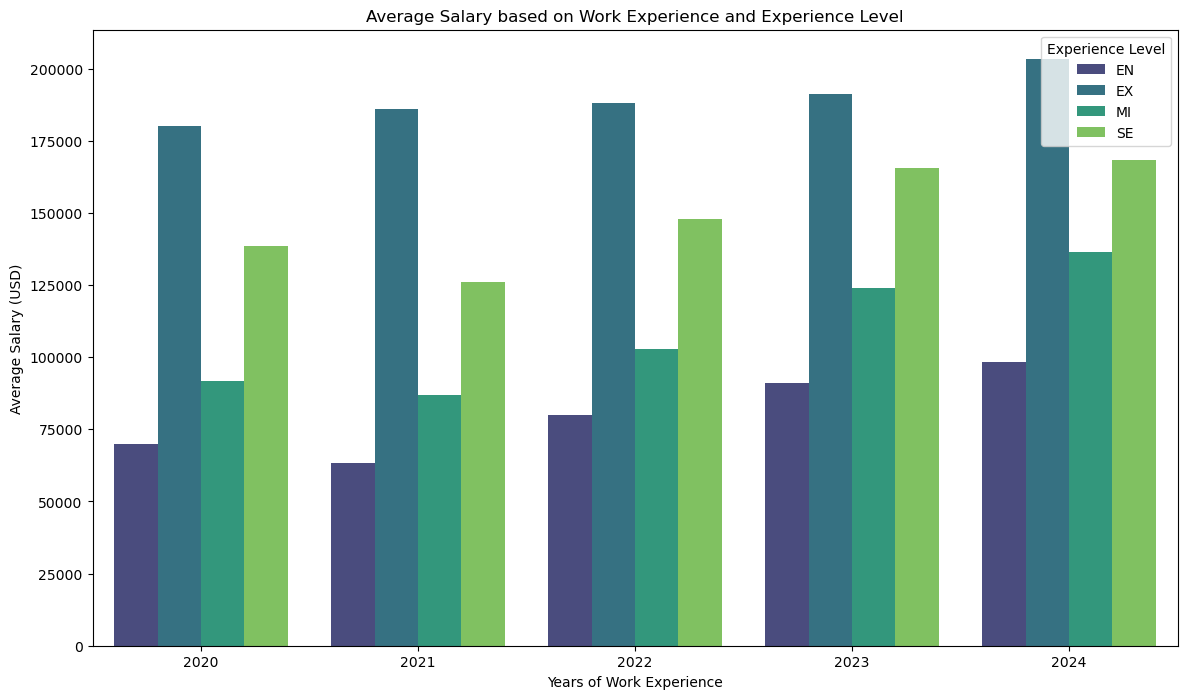

In [15]:
# Calculate the average salary for each year of work experience and experience level
average_salary = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='work_year', y='salary_in_usd', hue='experience_level', data=average_salary, palette='viridis')

# Customizing the plot
plt.xlabel('Years of Work Experience')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary based on Work Experience and Experience Level')
plt.legend(title='Experience Level')

plt.show()

**Employee Residence Analysis**

**Group Data:** Group the data by residence (country or region) and calculate the average salary for each residence.

**Create Plot:** Use seaborn to create a bar plot or box plot showing the average salary for each residence.

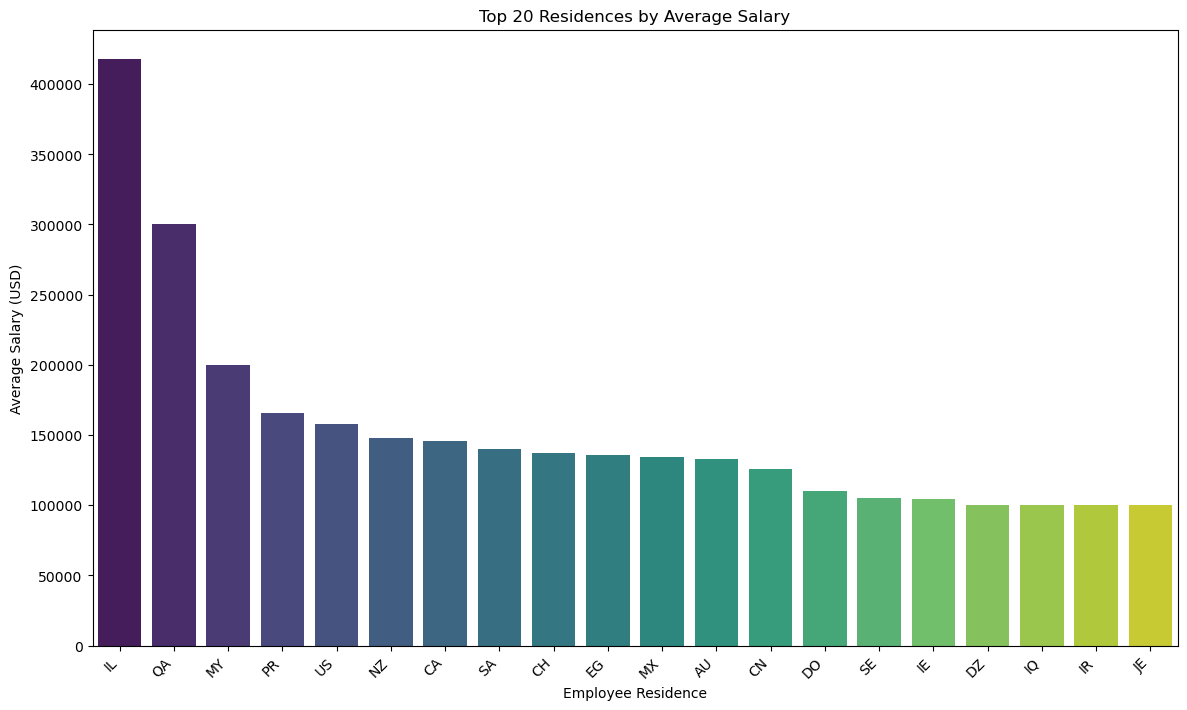

In [16]:
# Calculate the average salary for each residence
average_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Select the top 20 residences by average salary
top_20_residences = average_salary_by_residence.nlargest(20, 'salary_in_usd')

# Create the bar plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='employee_residence', y='salary_in_usd', data=top_20_residences, palette='viridis')

# Customizing the plot
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary (USD)')
plt.title('Top 20 Residences by Average Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

### Conclusion:

**Salary Analysis by Job Title and Experience Level:** Analyze the average salary across different job titles and experience levels to understand salary trends in the data science field.

**Salary Disparity Analysis:** Identify and visualize any significant salary disparities based on factors such as job title, experience level, or company size. This can help in highlighting areas where there might be inequities.

**Geographical Salary Comparison:** Compare salaries across different company locations or employee residences to identify regions where salaries are higher or lower. This analysis can provide insights into regional salary trends.

**Company Size and Salary Analysis:** Analyze how company size influences salaries in the data science field. Understanding this relationship can be valuable for both employees and employers.

**Trend Analysis:** Analyze the trends in salaries over the years or based on work experience. This can help in understanding how salaries have evolved and what factors might be influencing these trends.

**Employee Residence Analysis:** Explore how the residence of employees impacts their salaries. This analysis can provide insights into regional salary variations and help in understanding the factors influencing salary levels.